# **Tarea 11.1**

Nombre: Alejandra Arciniegas Marin, C.C 1000662159

<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2024-2/Sesiones/Sesion_11_SVM_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Importar librerías
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import  StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np
import matplotlib.pylab as plt
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

Tarea 11.1
1. Implementar un SVM para clasificar los siguientes datasets: make_moons, make_circles y make_bloobs, para ello se deberá crear un grid search.
2. Con los mejores párametros dibujar  las fronteras de clasificación
3. Con los mejores parámetros dibujar la matriz de confusion


Mejores parámetros para make_moons: {'C': 1, 'gamma': 10, 'kernel': 'rbf'}
Mejor precisión para make_moons: 0.9476190476190476

Reporte de clasificación para make_moons:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        38
           1       0.96      1.00      0.98        52

    accuracy                           0.98        90
   macro avg       0.98      0.97      0.98        90
weighted avg       0.98      0.98      0.98        90



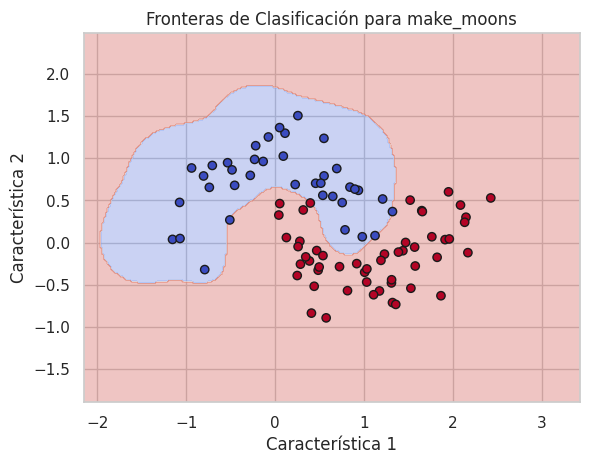

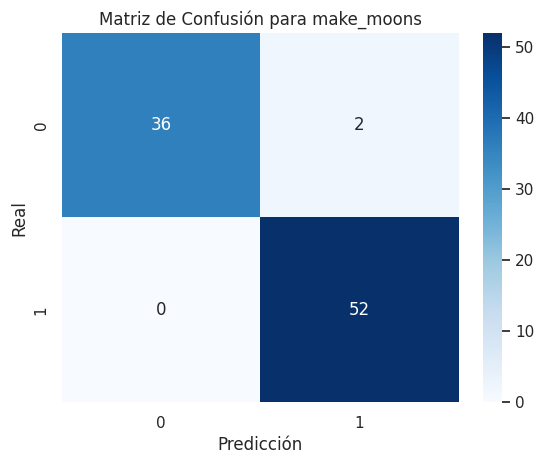

In [3]:
from sklearn.metrics import confusion_matrix, classification_report
# Estilo para las gráficas
sns.set(style='whitegrid')

# Dataset 1: make_moons
X_moons, y_moons = make_moons(n_samples=300, noise=0.2, random_state=42)
X_train_moons, X_test_moons, y_train_moons, y_test_moons = train_test_split(
    X_moons, y_moons, test_size=0.3, random_state=42
)

# Grid Search para make_moons
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1, 10],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}
svm = SVC()
grid_moons = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_moons.fit(X_train_moons, y_train_moons)

print("\nMejores parámetros para make_moons:", grid_moons.best_params_)
print("Mejor precisión para make_moons:", grid_moons.best_score_)

# Evaluación para make_moons
best_model_moons = grid_moons.best_estimator_
y_pred_moons = best_model_moons.predict(X_test_moons)
print("\nReporte de clasificación para make_moons:")
print(classification_report(y_test_moons, y_pred_moons))

# Fronteras de decisión para make_moons
x_min, x_max = X_test_moons[:, 0].min() - 1, X_test_moons[:, 0].max() + 1
y_min, y_max = X_test_moons[:, 1].min() - 1, X_test_moons[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = best_model_moons.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_test_moons[:, 0], X_test_moons[:, 1], c=y_test_moons, cmap=plt.cm.coolwarm, edgecolor='k')
plt.title("Fronteras de Clasificación para make_moons")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.show()

# Matriz de confusión para make_moons
cm_moons = confusion_matrix(y_test_moons, y_pred_moons)
sns.heatmap(cm_moons, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión para make_moons")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()



Mejores parámetros para make_circles: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Mejor precisión para make_circles: 0.8666666666666668

Reporte de clasificación para make_circles:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91        38
           1       0.96      0.90      0.93        52

    accuracy                           0.92        90
   macro avg       0.92      0.93      0.92        90
weighted avg       0.92      0.92      0.92        90



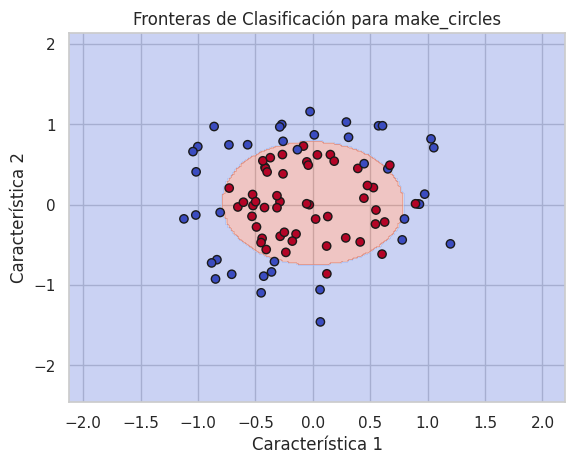

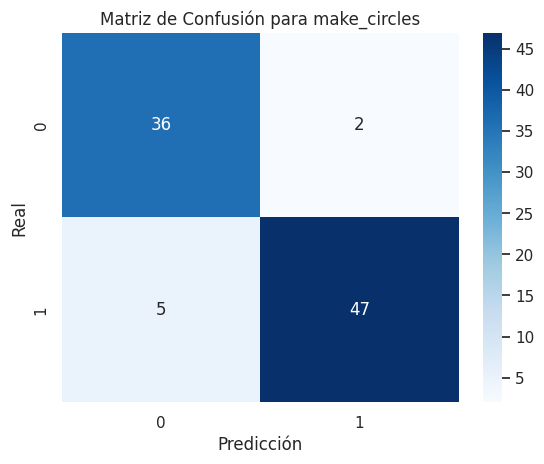

In [4]:
# Repetir análisis para make_circles
X_circles, y_circles = make_circles(n_samples=300, noise=0.2, factor=0.5, random_state=42)
X_train_circles, X_test_circles, y_train_circles, y_test_circles = train_test_split(
    X_circles, y_circles, test_size=0.3, random_state=42
)

grid_circles = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_circles.fit(X_train_circles, y_train_circles)

print("\nMejores parámetros para make_circles:", grid_circles.best_params_)
print("Mejor precisión para make_circles:", grid_circles.best_score_)

best_model_circles = grid_circles.best_estimator_
y_pred_circles = best_model_circles.predict(X_test_circles)
print("\nReporte de clasificación para make_circles:")
print(classification_report(y_test_circles, y_pred_circles))

x_min, x_max = X_test_circles[:, 0].min() - 1, X_test_circles[:, 0].max() + 1
y_min, y_max = X_test_circles[:, 1].min() - 1, X_test_circles[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = best_model_circles.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_test_circles[:, 0], X_test_circles[:, 1], c=y_test_circles, cmap=plt.cm.coolwarm, edgecolor='k')
plt.title("Fronteras de Clasificación para make_circles")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.show()

cm_circles = confusion_matrix(y_test_circles, y_pred_circles)
sns.heatmap(cm_circles, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión para make_circles")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()



Mejores parámetros para make_blobs: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
Mejor precisión para make_blobs: 1.0

Reporte de clasificación para make_blobs:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        48

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90



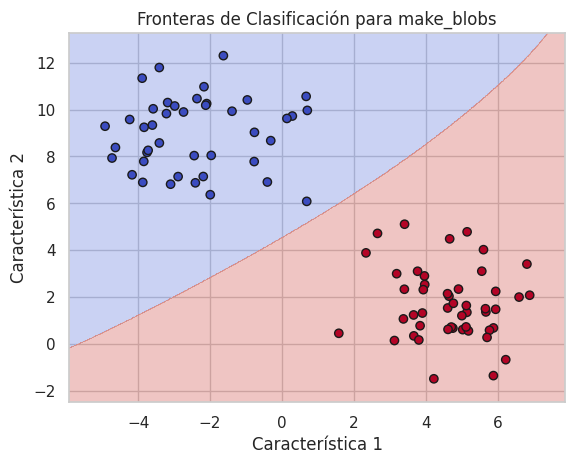

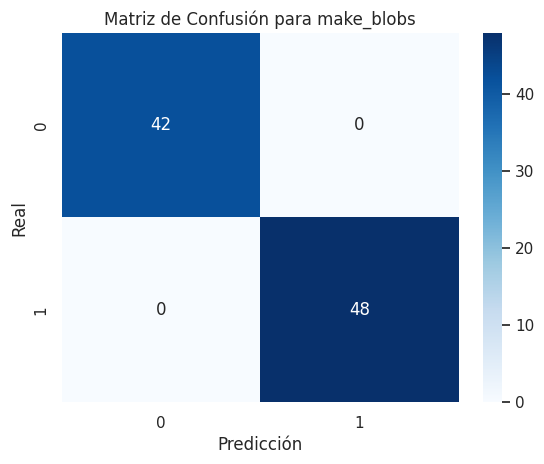

In [5]:
# Repetir análisis para make_blobs
X_blobs, y_blobs = make_blobs(n_samples=300, centers=2, cluster_std=1.5, random_state=42)
X_train_blobs, X_test_blobs, y_train_blobs, y_test_blobs = train_test_split(
    X_blobs, y_blobs, test_size=0.3, random_state=42
)

grid_blobs = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_blobs.fit(X_train_blobs, y_train_blobs)

print("\nMejores parámetros para make_blobs:", grid_blobs.best_params_)
print("Mejor precisión para make_blobs:", grid_blobs.best_score_)

best_model_blobs = grid_blobs.best_estimator_
y_pred_blobs = best_model_blobs.predict(X_test_blobs)
print("\nReporte de clasificación para make_blobs:")
print(classification_report(y_test_blobs, y_pred_blobs))

x_min, x_max = X_test_blobs[:, 0].min() - 1, X_test_blobs[:, 0].max() + 1
y_min, y_max = X_test_blobs[:, 1].min() - 1, X_test_blobs[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = best_model_blobs.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_test_blobs[:, 0], X_test_blobs[:, 1], c=y_test_blobs, cmap=plt.cm.coolwarm, edgecolor='k')
plt.title("Fronteras de Clasificación para make_blobs")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.show()

cm_blobs = confusion_matrix(y_test_blobs, y_pred_blobs)
sns.heatmap(cm_blobs, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión para make_blobs")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()
